# Building Machine Learning Pipelines: Data Analysis Phase

In this we focus on creating Machine Learning Pipelines considering all the life cycle of a Data Science Projects. This will be important for professionals who have not worked with huge dataset.

# Exploratory Data Analysis Notebook

## Procedures for the task
1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

**This notebook focusses on Data Analysis of House Prediction Data** 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pd.options.display.max_columns

data = pd.read_csv('C:/Users/Lenovo/Downloads/house-prices-advanced-regression-techniques/train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.shape

(1460, 81)

In [4]:
data.isnull().sum().sum()

6965

## Locating Missing Values

In [5]:
missing_vals = [f for f in data.columns if data[f].isnull().sum()>1]

for feature in missing_vals:
    print(feature, np.round(data[feature].isnull().mean(), 4),  ' % missing values')

LotFrontage 0.1774  % missing values
Alley 0.9377  % missing values
MasVnrType 0.0055  % missing values
MasVnrArea 0.0055  % missing values
BsmtQual 0.0253  % missing values
BsmtCond 0.0253  % missing values
BsmtExposure 0.026  % missing values
BsmtFinType1 0.0253  % missing values
BsmtFinType2 0.026  % missing values
FireplaceQu 0.4726  % missing values
GarageType 0.0555  % missing values
GarageYrBlt 0.0555  % missing values
GarageFinish 0.0555  % missing values
GarageQual 0.0555  % missing values
GarageCond 0.0555  % missing values
PoolQC 0.9952  % missing values
Fence 0.8075  % missing values
MiscFeature 0.963  % missing values


## Missing Values effect on Sales Price Values
- **Since the dataset consists of 6965 missing values, we need to check if it is affecting the values in sales price as well** 

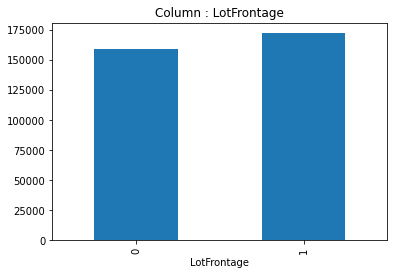

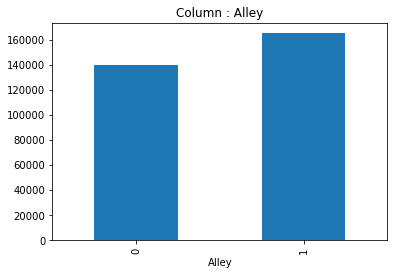

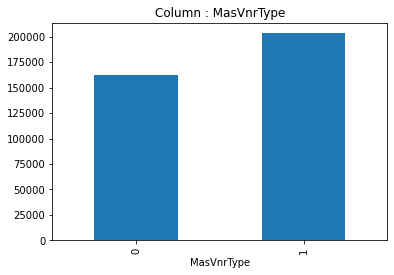

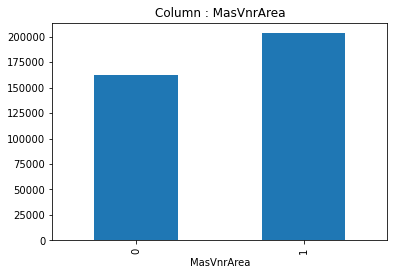

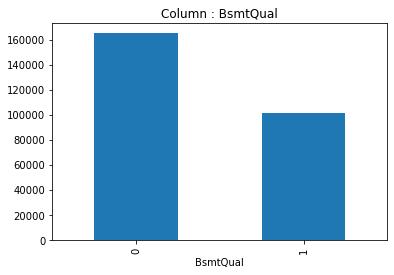

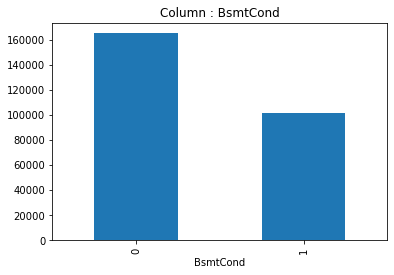

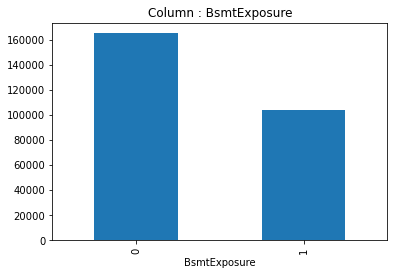

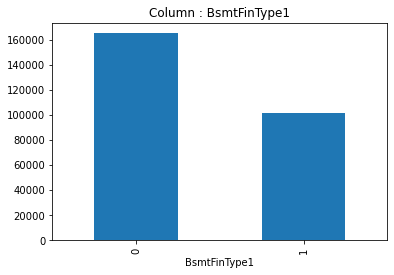

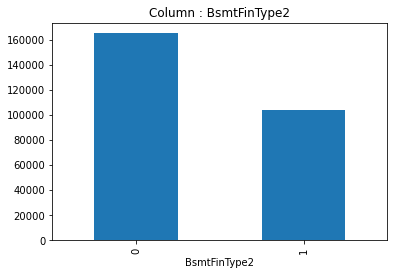

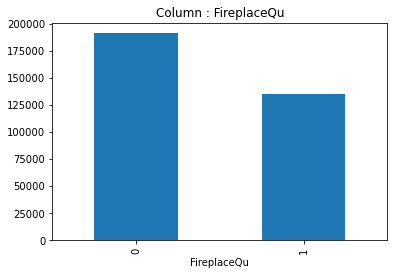

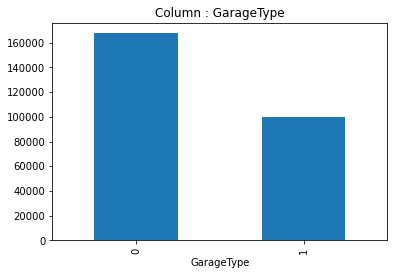

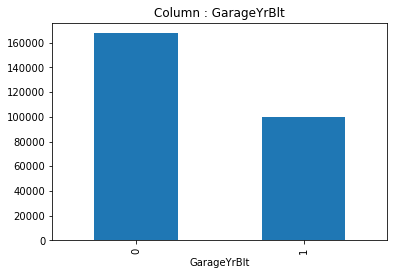

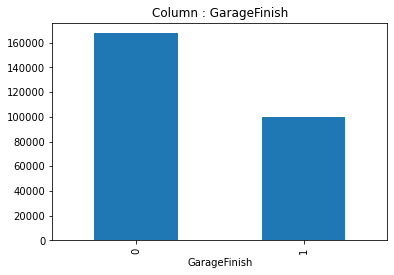

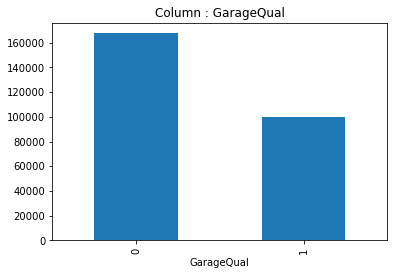

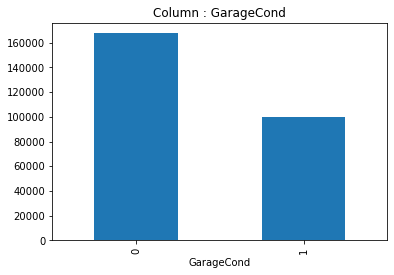

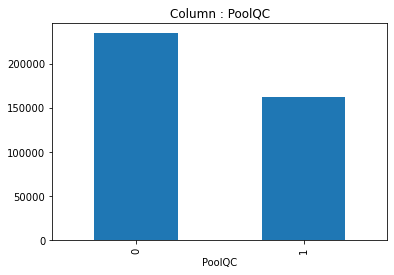

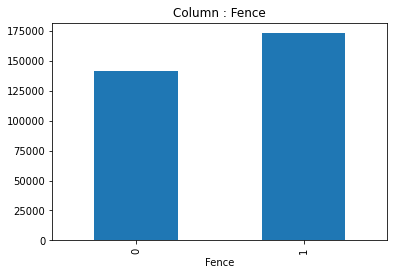

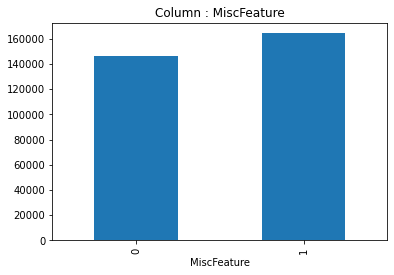

In [6]:
for features in missing_vals:
    dataset = data.copy()
    
    ##labelling missing values with 1 and others with 0
    dataset[features] = np.where(dataset[features].isnull(), 1, 0)
    
    ## calculating median of SalePrice column where values are missing
    dataset.groupby(features)['SalePrice'].median().plot.bar()
    plt.title('Column : {}'.format(features))
    plt.show()

**Here With the relation between the missing values and the dependent variable is clearly visible. So We need to replace these NaN values with something meaningful which we will do in the Feature Engineering section.**

**From the above dataset some of the features like Id is not required**

In [7]:
print('Id of Houses : {} '.format(len(data['Id'])))

Id of Houses : 1460 


## Let's Check Numerical features
- **Now that we know, that data consists of certain categorical features, we can now check how many numerical values ['int', 'float'] are present**

In [8]:
num_vals = [features for features in data.columns if data[features].dtypes != 'O']

print('Numerical value counts : {}'.format(len(num_vals)))

data[num_vals].head()

Numerical value counts : 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


## Temporal Variables (Datetime Cols)

In [9]:
year_vals = [features for features in num_vals if 'Year' in features or 'Yr' in features]

year_vals

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [10]:
# let's explore the content of these year variables
for feature in year_vals:
    print(feature, data[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

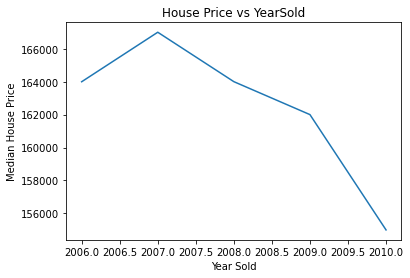

In [11]:
##let's see the SalePrice values over the years
## We will check whether there is a relation between year the house is sold and the sales price

data.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")
plt.show()

**Here the house prices are decreasing over the years, which seems impractical, so let us do some more analysis based on this**

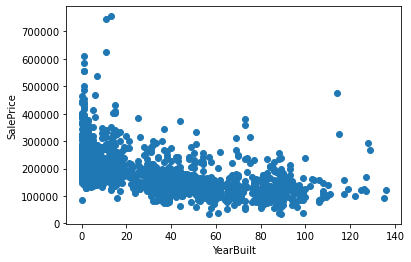

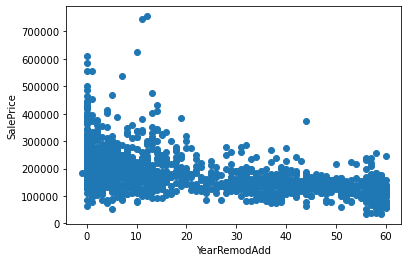

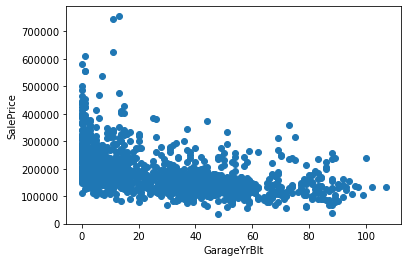

In [12]:
## Here we will compare the difference between All years feature with SalePrice

for feature in year_vals:
    if feature !='YrSold':
        dataset = data.copy()
        ## We will capture the difference between year variable and year the house was sold for
        dataset[feature] = dataset['YrSold'] - dataset[feature]

        plt.scatter(dataset[feature], dataset['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

**Observations**
- **So here we can clearly understand that, the houses that were very old were actually sold for lesser price which totally makes sense**

## Calculating Counts of Discrete and Continuous Values
- **These will be then compared with SalePrice column for better understanding**

In [13]:
## taking counts lesser than 25 as discrete
discrete_vals = [feature for feature in num_vals if len(data[feature].unique())<25 and feature not in year_vals+['Id']]

print("Discrete Variables Count: {}".format(len(discrete_vals)))

Discrete Variables Count: 17


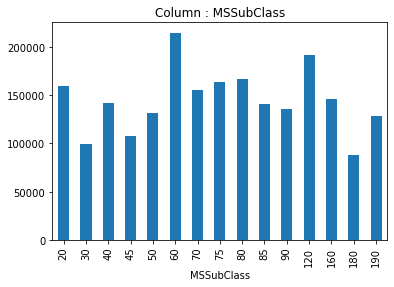

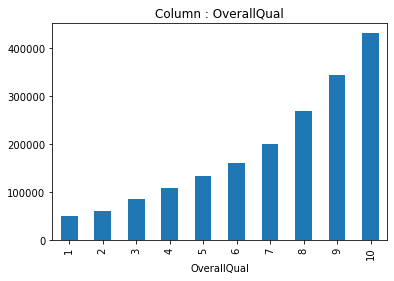

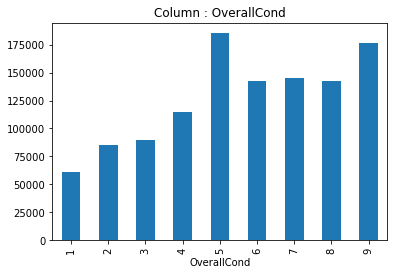

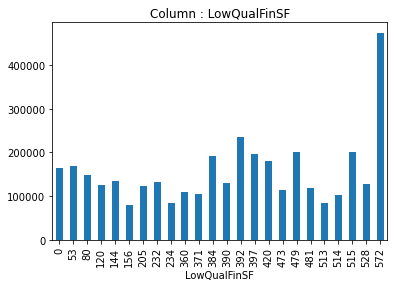

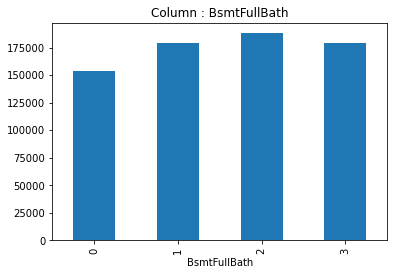

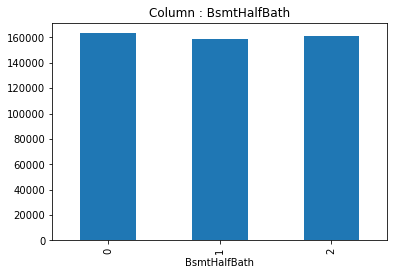

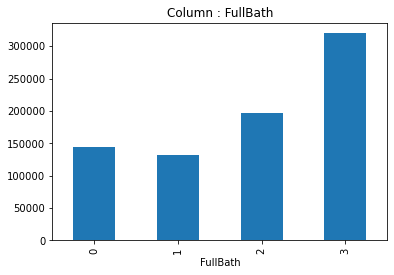

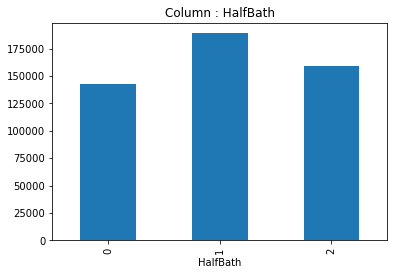

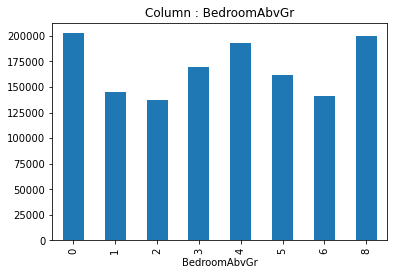

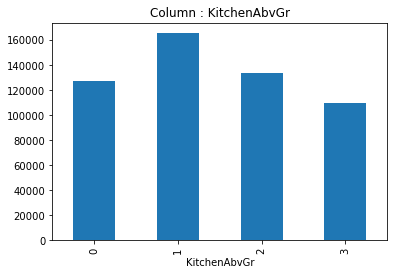

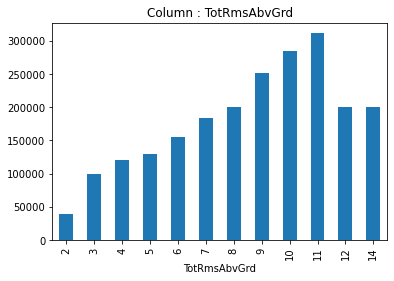

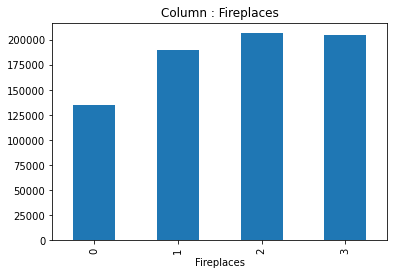

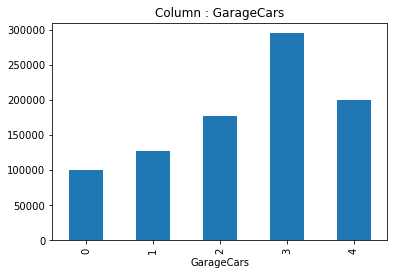

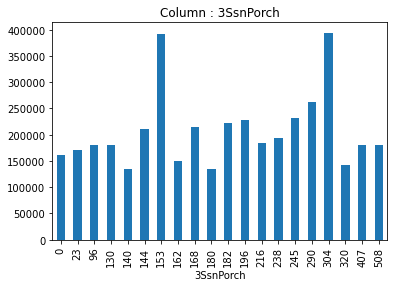

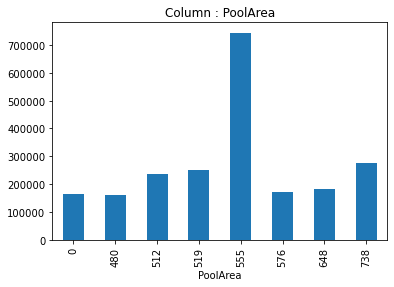

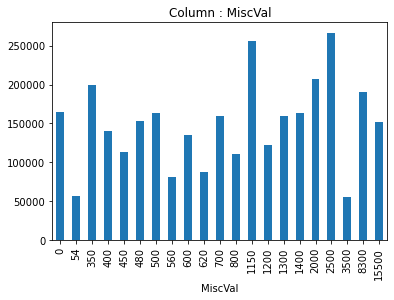

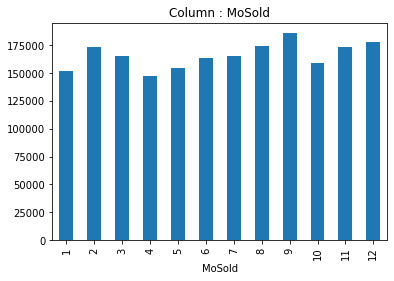

In [14]:
##comparing with SalePrice

for f in discrete_vals:
    dataset = data.copy()
    dataset.groupby(f)['SalePrice'].median().plot.bar()
    plt.title('Column : {}'.format(f))
    plt.show()

**Observations**
- **So here we can clearly understand that, there is a relationship**

In [15]:
##Now for continuous values
continuous_vals = [feature for feature in num_vals if feature not in discrete_vals + year_vals + ['Id']]

print("Continuous Variables Count: {}".format(len(continuous_vals)))

Continuous Variables Count: 16


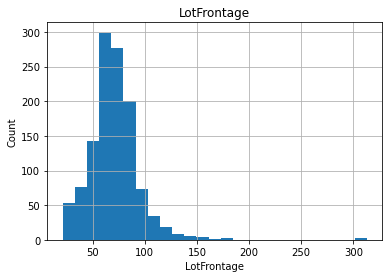

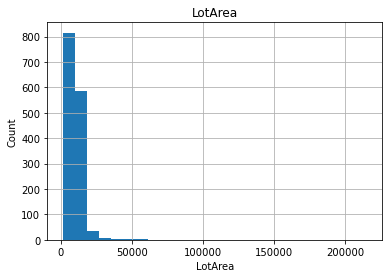

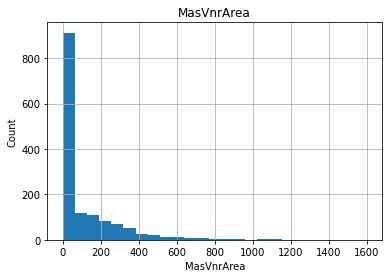

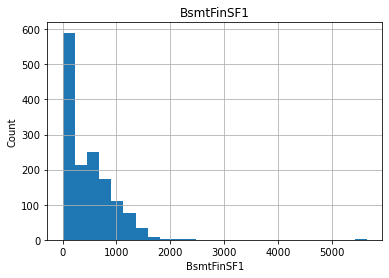

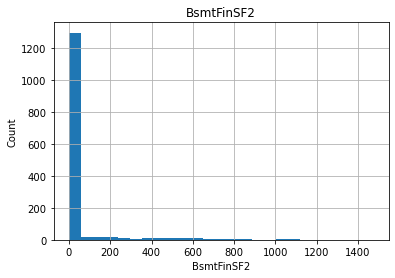

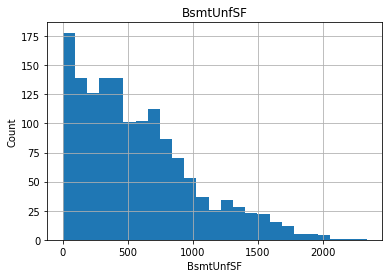

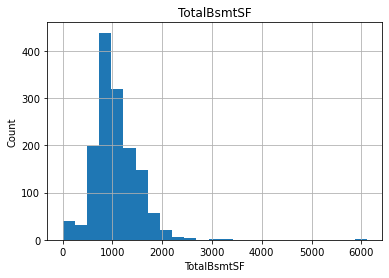

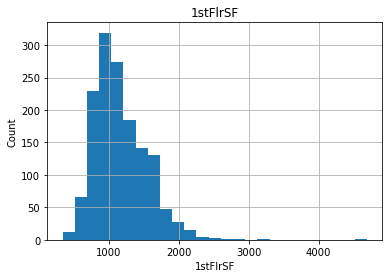

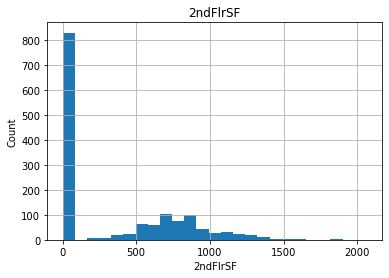

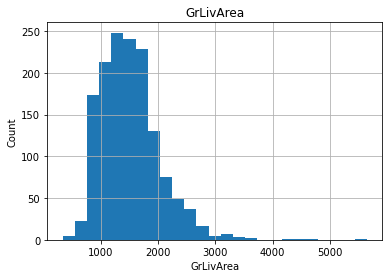

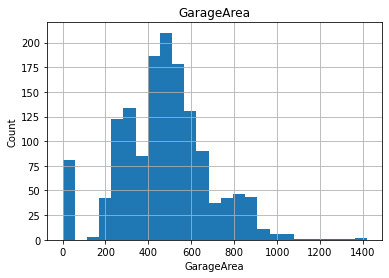

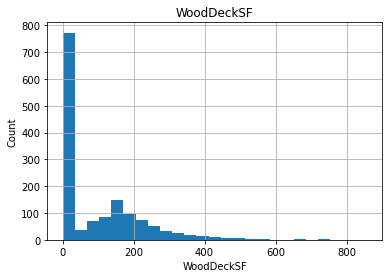

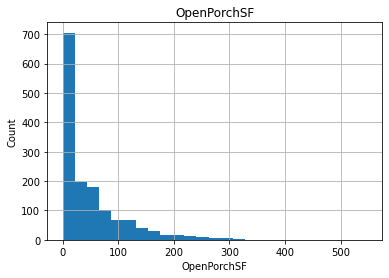

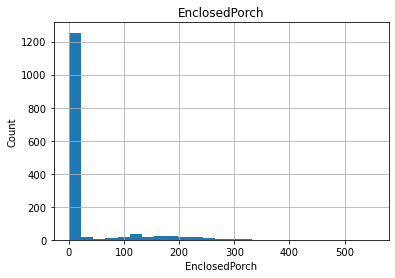

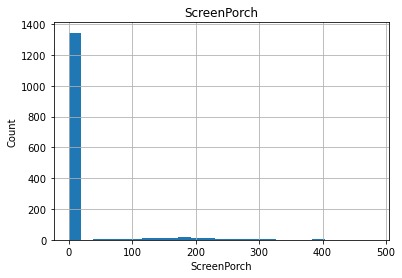

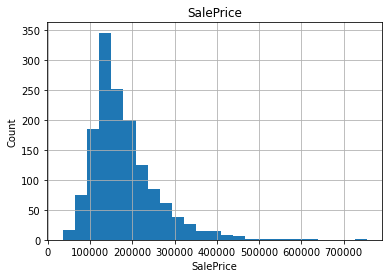

In [16]:
for f in continuous_vals:
    dataset = data.copy()
    dataset[f].hist(bins=25)
    plt.xlabel(f)
    plt.ylabel("Count")
    plt.title(f)
    plt.show()

**So the plots are not gaussian, as these are somewhat skewed so for better analysis, in feature engineering part we shall first convert these into gaussian**

# Exploratory Analysis - 2
- **Let us convert the distribution to Normal, using Log Transformation**

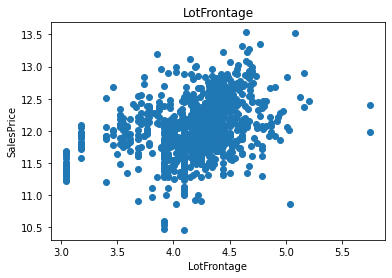

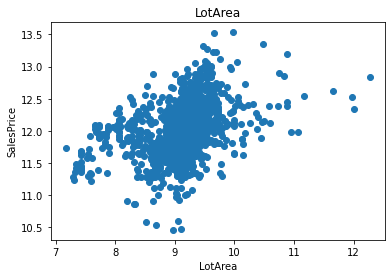

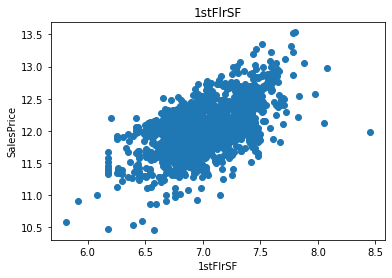

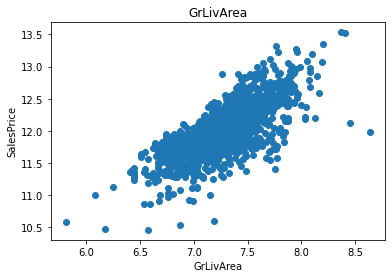

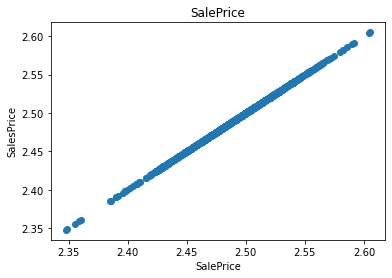

In [18]:
for feature in continuous_vals:
    dataset = data.copy()
    if 0 in dataset[feature].unique():
        pass
    else:
        dataset[feature] = np.log(dataset[feature])
        dataset['SalePrice'] = np.log(dataset['SalePrice'])
        plt.scatter(dataset[feature], dataset['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

## Outlier Detection

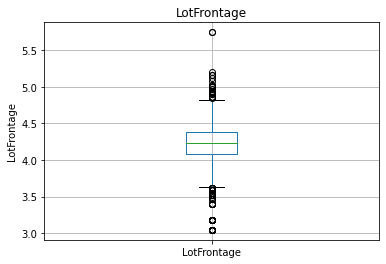

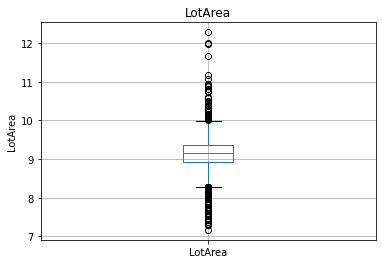

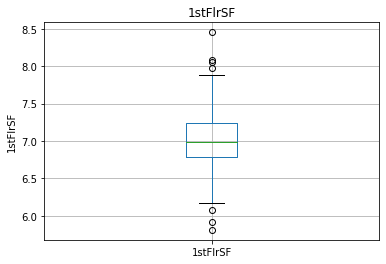

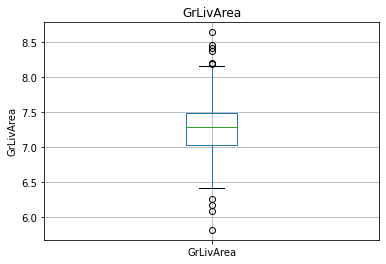

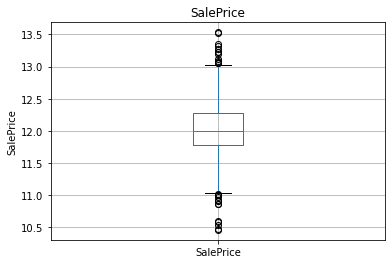

In [21]:
##using Log transformation techniques and boxplots for outlier detection

for feature in continuous_vals:
    dataset = data.copy()
    if 0 in dataset[feature].unique():
        pass
    else:
        dataset[feature] = np.log(dataset[feature])
        dataset.boxplot(column = feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

## Categorical Features

In [29]:
categorical_vals = [feature for feature in data.columns if data[feature].dtypes == 'O']
categorical_vals

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [25]:
data[categorical_vals].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


## Checking Cardinal Values

In [31]:
##let's check cardinal values which are categories inside the categorical columns
for x in categorical_vals:
    print('The features are {}, and categories are {} '.format(x, len(data[x].unique())))

The features are MSZoning, and categories are 5 
The features are Street, and categories are 2 
The features are Alley, and categories are 3 
The features are LotShape, and categories are 4 
The features are LandContour, and categories are 4 
The features are Utilities, and categories are 2 
The features are LotConfig, and categories are 5 
The features are LandSlope, and categories are 3 
The features are Neighborhood, and categories are 25 
The features are Condition1, and categories are 9 
The features are Condition2, and categories are 8 
The features are BldgType, and categories are 5 
The features are HouseStyle, and categories are 8 
The features are RoofStyle, and categories are 6 
The features are RoofMatl, and categories are 8 
The features are Exterior1st, and categories are 15 
The features are Exterior2nd, and categories are 16 
The features are MasVnrType, and categories are 5 
The features are ExterQual, and categories are 4 
The features are ExterCond, and categories ar

**Most of the above columns, can be one-hot encoded, except for cols, where the values are more than 10**

## Relationship between Categorical Vals and SalePrice

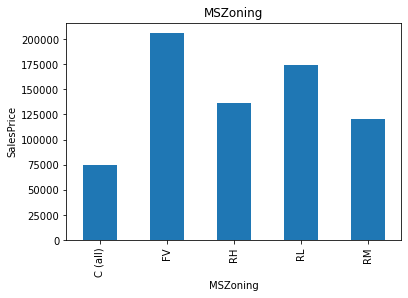

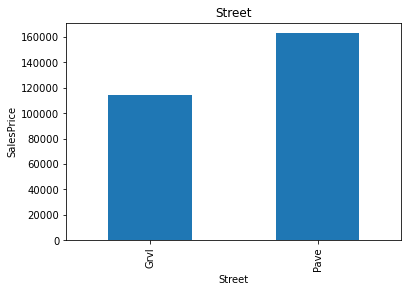

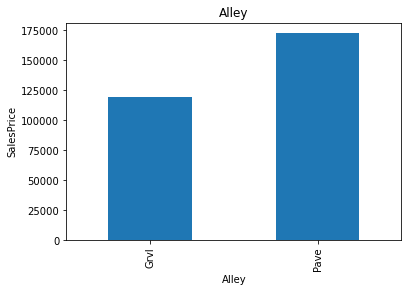

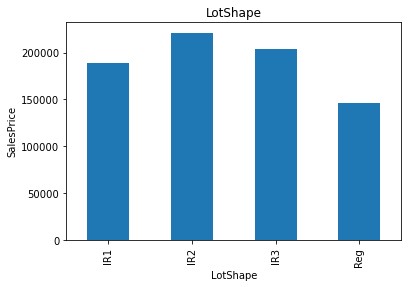

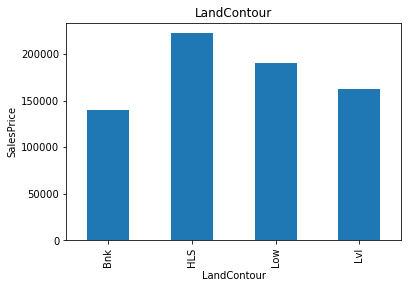

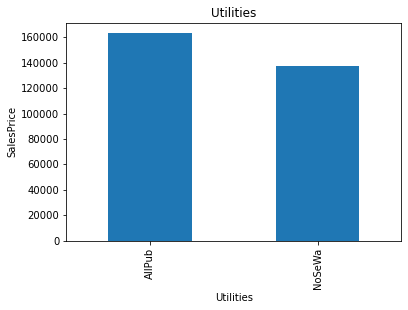

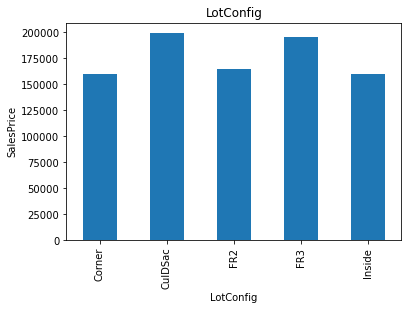

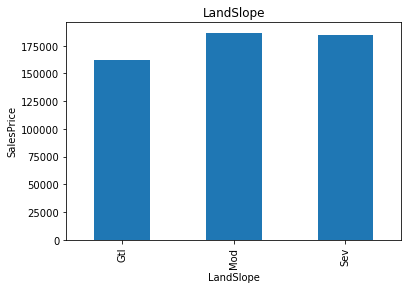

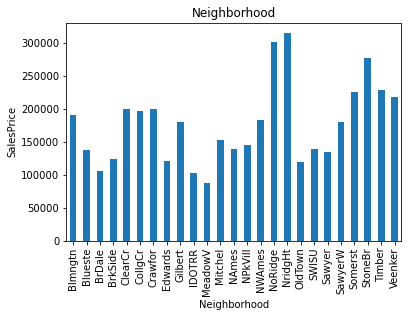

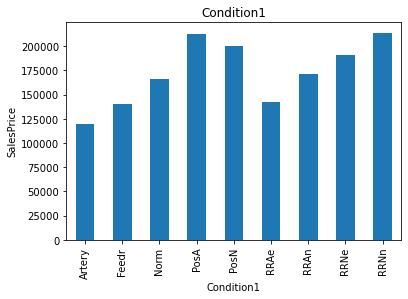

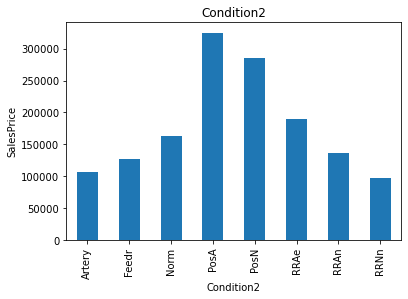

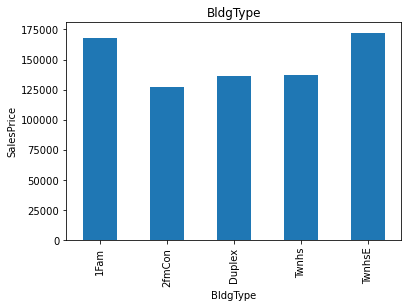

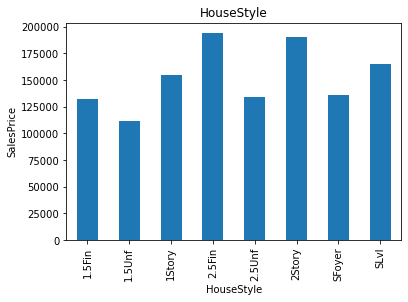

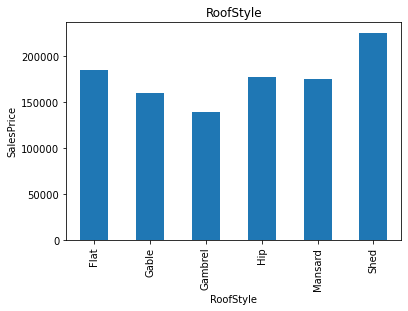

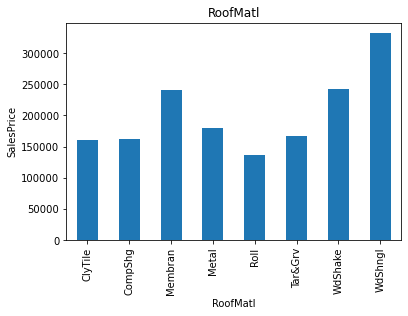

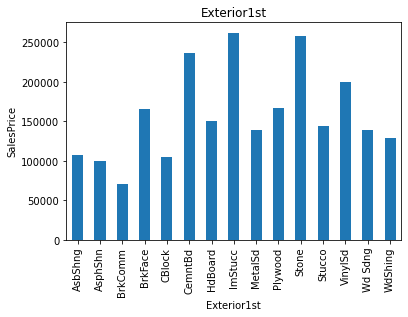

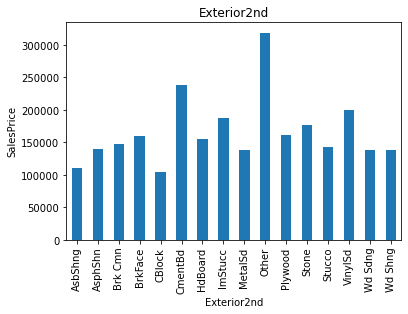

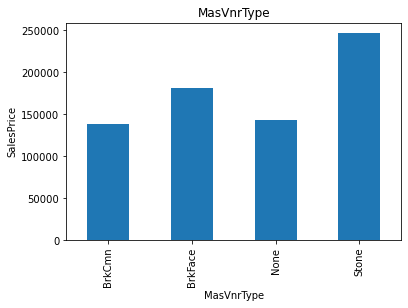

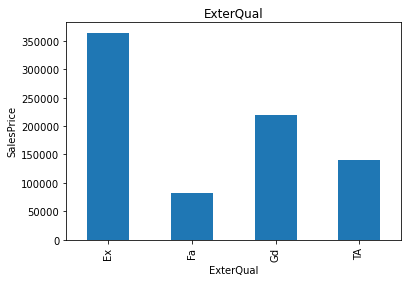

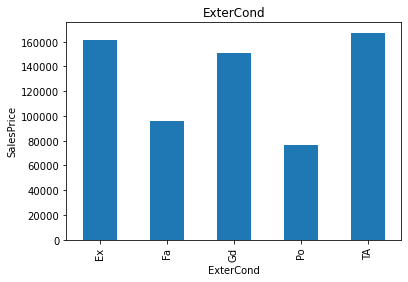

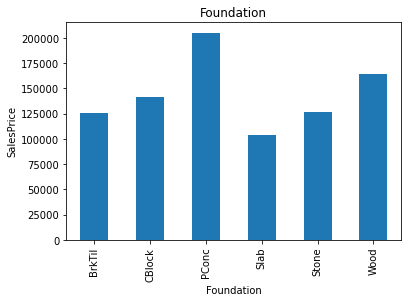

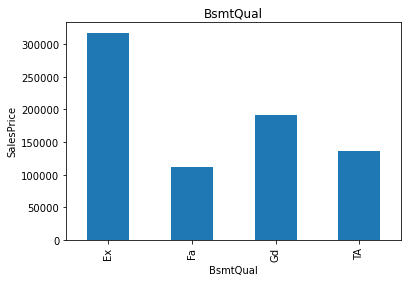

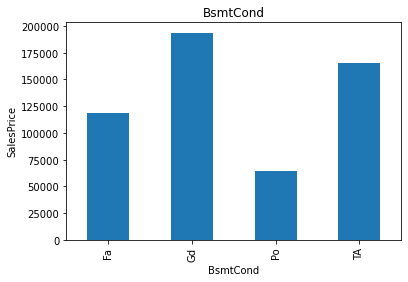

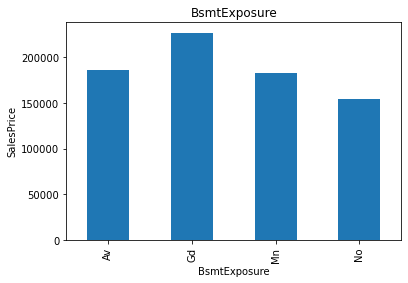

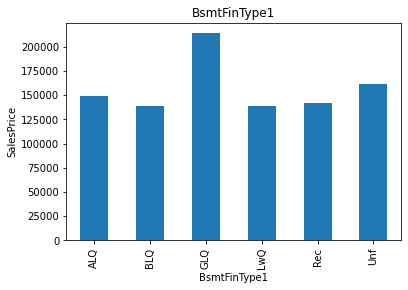

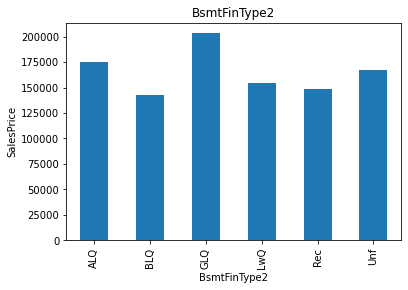

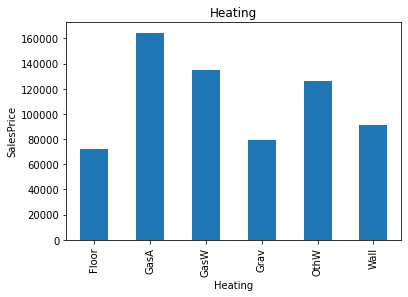

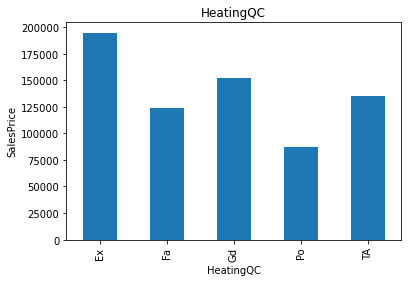

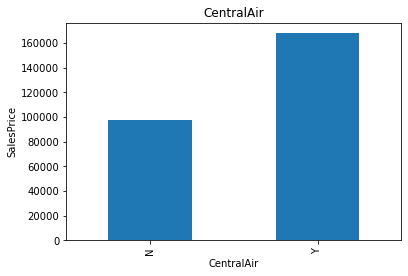

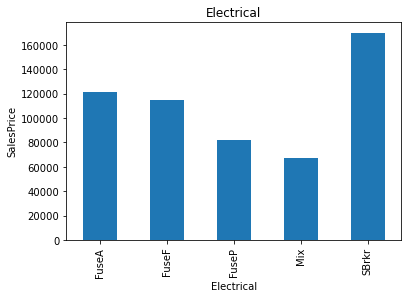

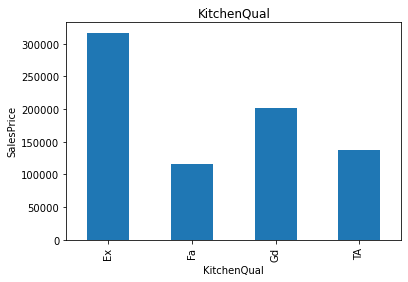

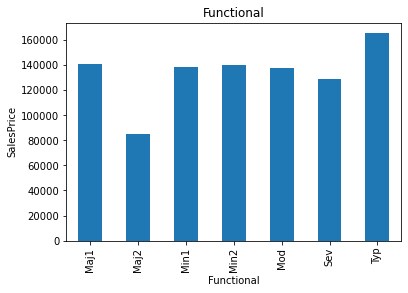

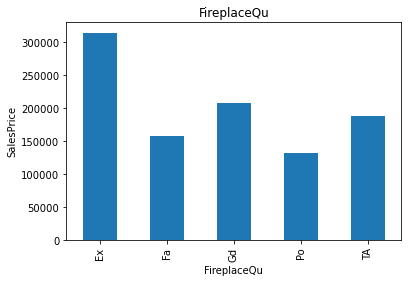

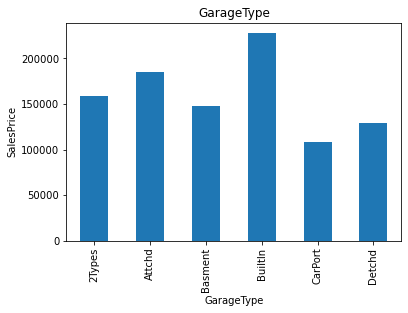

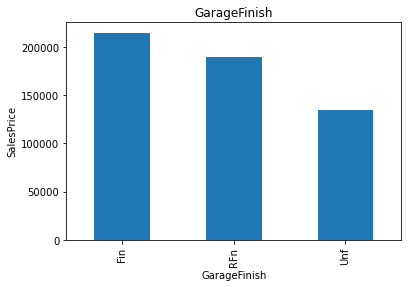

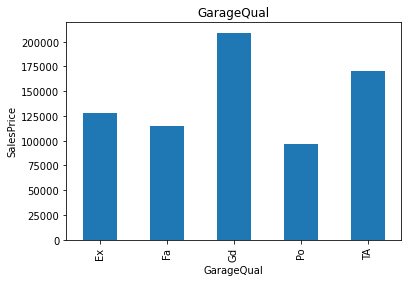

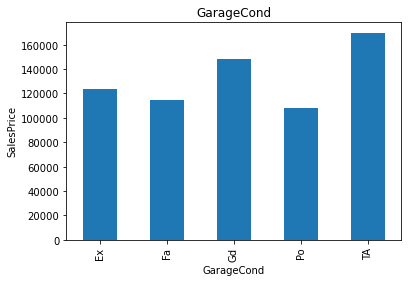

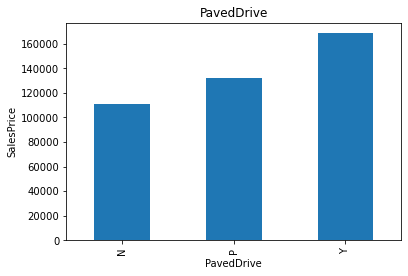

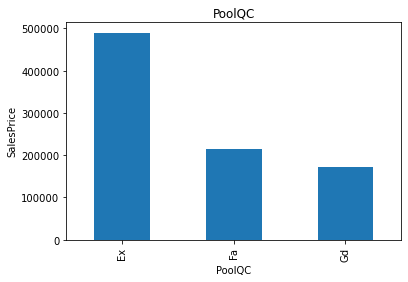

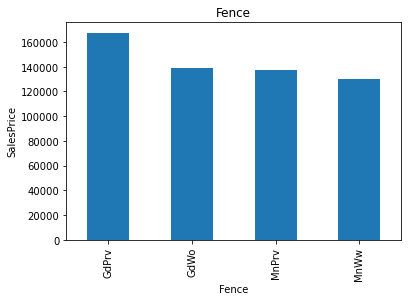

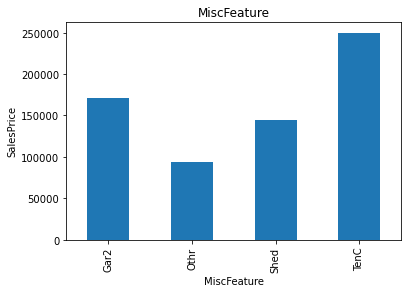

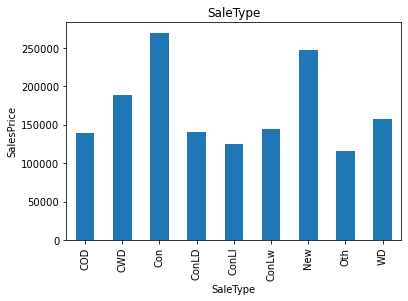

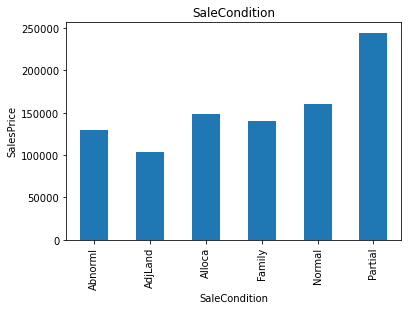

In [32]:
for feature in categorical_vals:
    dataset = data.copy() #to make sure the original dataset is not tampered upon
    dataset.groupby(feature)['SalePrice'].median().plot.bar() ##this will prevent any outlier based problems
    plt.xlabel(feature)
    plt.ylabel('SalesPrice')
    plt.title(feature)
    plt.show()